In [4]:
import pandas as pd
import numpy as nm

In [6]:
df=pd.read_csv("vehicles.csv")
df.head(10)

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive
5,2024 Nissan Murano Platinum,\n \n Boasts 28 Highway MPG and 20...,Nissan,Murano,2024,46000.0,24V MPFI DOHC,6.0,Gasoline,3838.0,Automatic CVT,Platinum,SUV,4.0,White,Gray,All-wheel Drive
6,2024 Jeep Wagoneer Base,\n \n Alloy Wheels / Premium Whee...,Jeep,Wagoneer,2024,63862.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5.0,8-Speed Automatic,Base,SUV,4.0,Bright White Clearcoat,Black,Rear-wheel Drive
7,2024 Ford F-350 Lariat Super Duty,\n \n Engine: 6.7L High Output Pow...,Ford,F-350,2024,89978.0,32V DDI OHV Turbo Diesel,8.0,Diesel,15.0,10-Speed Automatic,Lariat Super Duty,Pickup Truck,4.0,Carbonized Gray Metallic,Black Onyx,Four-wheel Drive
8,2024 Hyundai Tucson Hybrid Limited,NaN,Hyundai,Tucson Hybrid,2024,42230.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,5.0,6-Speed Automatic,Limited,SUV,4.0,White Pearl,Black,All-wheel Drive
9,2024 Jeep Grand Cherokee Altitude,\n \n Silver Zynith 2024 Jeep Gran...,Jeep,Grand Cherokee,2024,42773.0,"ar 3.6L V-6 DOHC, variable valve control, regu...",6.0,Gasoline,20.0,Automatic,Altitude,SUV,4.0,Silver Zynith,Global Black,Four-wheel Drive


In [8]:
df.isnull().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [10]:
df = df[df['price'].notna()]
df = df[df['cylinders'].notna()]
df['description'].fillna('',inplace=True)
df['mileage'].fillna(df['mileage'].mode()[0],inplace=True)
df['fuel'].fillna(df['fuel'].mode()[0], inplace=True)
df['transmission'].fillna(df['transmission'].mode()[0],inplace=True)
print(df.isnull().sum())

name               0
description        0
make               0
model              0
year               0
price              0
engine             2
cylinders          0
fuel               0
mileage            0
transmission       0
trim               1
body               3
doors              5
exterior_color     4
interior_color    35
drivetrain         0
dtype: int64


## Data visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

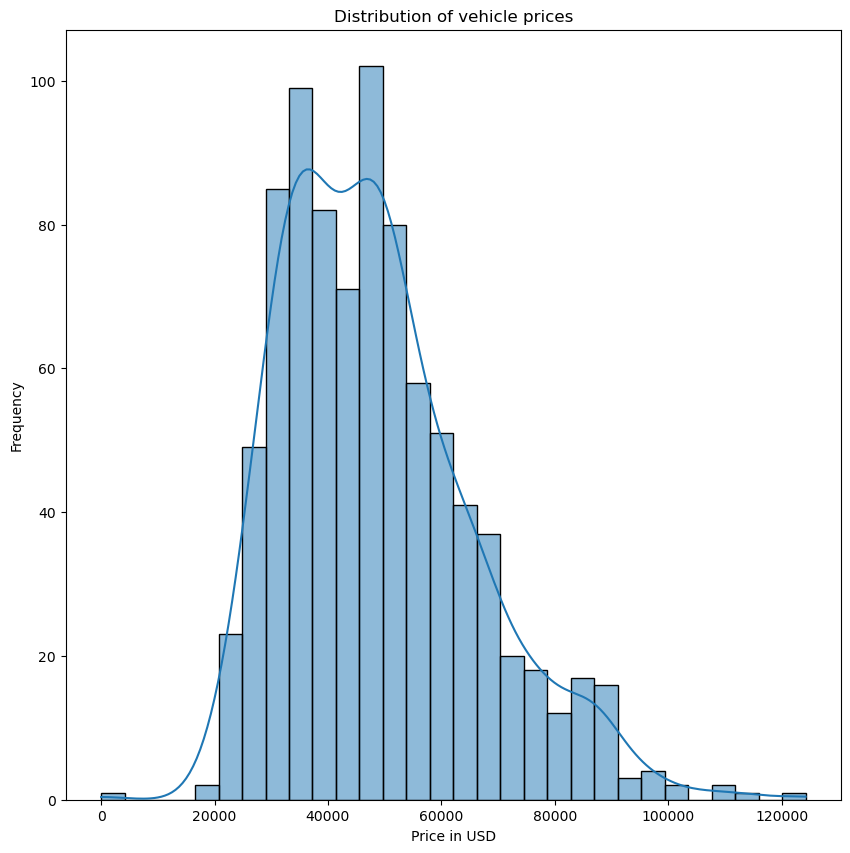

In [15]:
plt.figure(figsize=(10,10))
sns.histplot(df['price'],bins=30,kde=True)
plt.title('Distribution of vehicle prices')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()

## price vs mileage

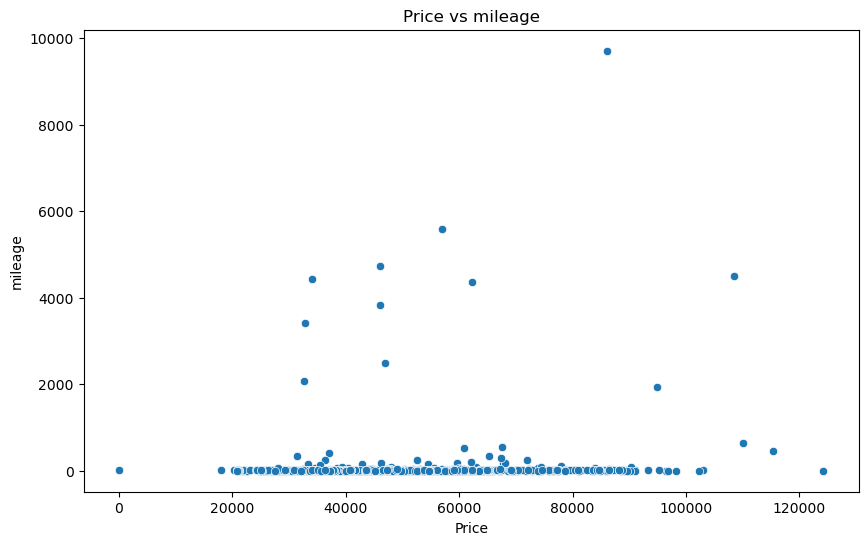

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='mileage',data=df)
plt.title('Price vs mileage')
plt.xlabel('Price')
plt.ylabel('mileage')
plt.show()

## average price by year

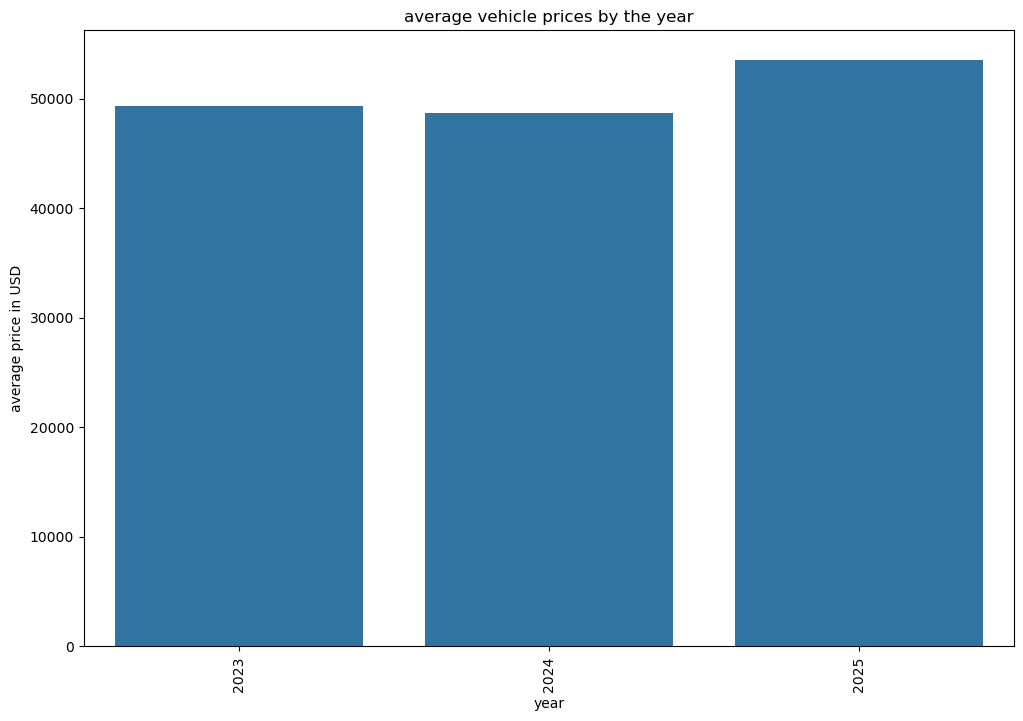

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x='year',y='price',data=df.groupby('year')['price'].mean().reset_index())
plt.title('average vehicle prices by the year')
plt.xlabel('year')
plt.ylabel('average price in USD')
plt.xticks(rotation=90)
plt.show()

## adding new features into the model

In [24]:
present_year=pd.to_datetime('now').year
df['vehicle_age']=present_year-df['year']

In [26]:
df['make_model']=df['make']+' '+df['model']
print(df[['year','vehicle_age','make','model','make_model']].head())

   year  vehicle_age   make           model           make_model
0  2024            0   Jeep        Wagoneer        Jeep Wagoneer
1  2024            0   Jeep  Grand Cherokee  Jeep Grand Cherokee
2  2024            0    GMC        Yukon XL         GMC Yukon XL
3  2023            1  Dodge         Durango        Dodge Durango
4  2024            0    RAM            3500             RAM 3500


## data preparation

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [31]:
current_year = pd.to_datetime('now').year
df['vehicle_age'] = current_year - df['year']
df['make_model'] = df['make'] + ' ' + df['model']
x=df.drop('price',axis=1)
y=df['price']
cat_features=['make','model','fuel','transmission','body','exterior_color','interior_color','drivetrain','make_model']
num_features=x.select_dtypes(include=['int64','float64']).columns
preprocessor=ColumnTransformer(transformers=[('num','passthrough',num_features),('cat',OneHotEncoder(),cat_features)])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [35]:
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', LinearRegression())]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', RandomForestRegressor(random_state=42))])
}

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('vehicles.csv')

# Assume 'price' is the target variable and the rest are features
X = data.drop('price', axis=1)
y = data['price']

# Remove rows where target variable (y) is NaN
X = X[~y.isna()]
y = y.dropna()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
num_features = x_train.select_dtypes(include=['int64', 'float64']).columns
cat_features = x_train.select_dtypes(include=['object']).columns

# Define the preprocessors
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

# Define the models
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))]),
    'Support Vector Regressor': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SVR())])
}

# Fit the models on training data
for model_name, model_pipeline in models.items():
    print(f"Training {model_name}...")
    model_pipeline.fit(x_train, y_train)

# Predict with the models
predictions = {}
for model_name, model_pipeline in models.items():
    print(f"Predicting with {model_name}...")
    predictions[model_name] = model_pipeline.predict(x_test)

# Print the predictions for each model
for model_name, prediction in predictions.items():
    print(f"\nPredictions using {model_name}:")
    print(prediction)


Training Linear Regression...
Training Random Forest...
Training Support Vector Regressor...
Predicting with Linear Regression...
Predicting with Random Forest...
Predicting with Support Vector Regressor...

Predictions using Linear Regression:
[ 27069.09886948  60923.10256335  70899.29984304  33202.57180137
  32623.83549384  53545.95936115  49239.86395297  55771.99224419
  48033.53530196  47910.56514117  40623.72202892 118224.234861
  46477.29398631  41975.01533491  68010.47542623 107512.88956683
  31080.98061347  60476.25234563  65562.86393683  47294.46620063
  41150.14329621  88649.80005237  61871.21729292  34112.669954
  55220.25458848  25486.76280377  47052.92236886  65502.98474335
  50462.89724982  66814.77012805  45804.84938285  22606.19515532
  64937.04356273  57471.15152085  31269.84177661  34814.61529142
  36698.99082019  57420.49103858  47152.57455351  71150.56103023
  41910.81542057  45888.5783038   55113.45145267  40498.55223531
  46339.20828513  55776.5693691   34990.3623

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


for model_name, model_pipeline in models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model_pipeline.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")

for model_name, prediction in predictions.items():
    print(f"\nPredictions using {model_name}:")
    print(prediction)



Evaluating Linear Regression...
Mean Absolute Error (MAE): 5435.504720913941
Mean Squared Error (MSE): 81064160.22798078
R^2 Score: 0.734555616333197

Evaluating Random Forest...
Mean Absolute Error (MAE): 4601.755341720779
Mean Squared Error (MSE): 67937669.18264413
R^2 Score: 0.7775382774184162

Evaluating Support Vector Regressor...
Mean Absolute Error (MAE): 12840.516483748987
Mean Squared Error (MSE): 313688951.51964664
R^2 Score: -0.027173662997832526

Predictions using Linear Regression:
[ 27069.09886948  60923.10256335  70899.29984304  33202.57180137
  32623.83549384  53545.95936115  49239.86395297  55771.99224419
  48033.53530196  47910.56514117  40623.72202892 118224.234861
  46477.29398631  41975.01533491  68010.47542623 107512.88956683
  31080.98061347  60476.25234563  65562.86393683  47294.46620063
  41150.14329621  88649.80005237  61871.21729292  34112.669954
  55220.25458848  25486.76280377  47052.92236886  65502.98474335
  50462.89724982  66814.77012805  45804.84938285

Performing Grid Search for Linear Regression...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit

Performing Grid Search for Random Forest...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator

Performing Grid Search for Support Vector Regressor...

Evaluating optimized models...

Evaluating Linear Regression...
Mean Absolute Error (MAE): 5435.504720913941
Mean Squared Error (MSE): 81064160.22798078
R^2 Score: 0.734555616333197

Evaluating Random Forest...
Mean Absolute Error (MAE): 4655.144012528713
Mean Squared Error (MSE): 68745724.53362484
R^2 Score: 0.7748923022549592

Evaluating Support Vector Regressor...
Mean Absolute Error (MAE): 5160.91845870386
Mean Squared Error (MSE): 81603999.428703
R^2 Score: 0.7327879142622462


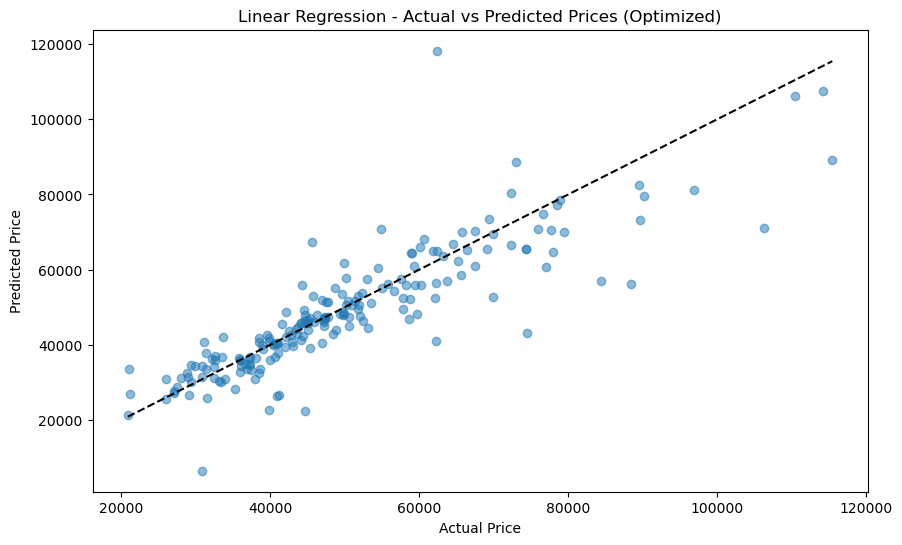

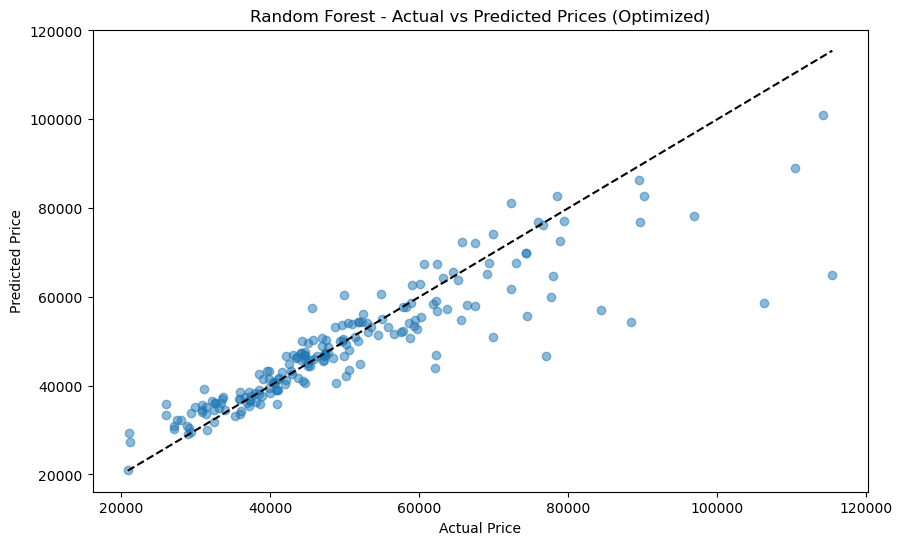

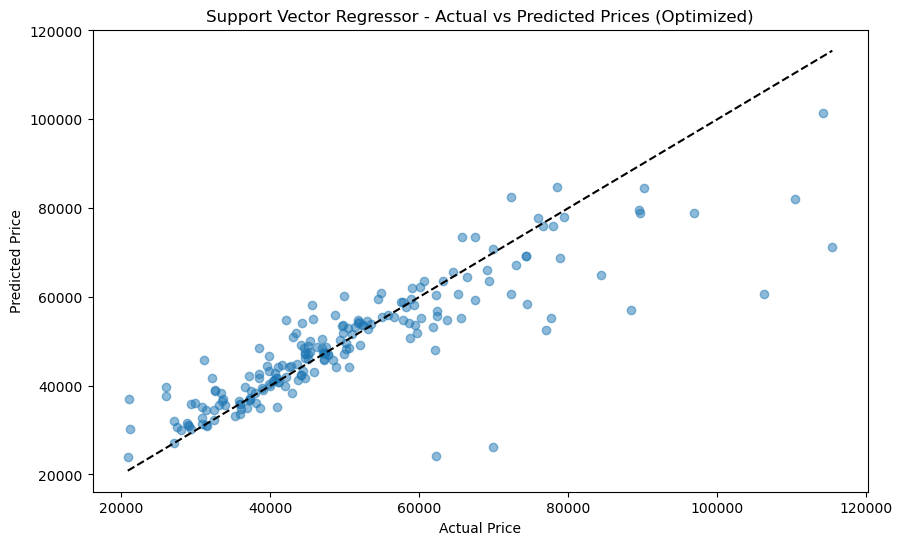

In [41]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grid_lr = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}

param_grid_rf = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

param_grid_svr = {
    'regressor__C': [0.1, 1, 10, 100],
    'regressor__gamma': [1, 0.1, 0.01, 0.001],
    'regressor__kernel': ['linear', 'rbf', 'poly']
}

# Create grid search objects
grid_search_lr = GridSearchCV(models['Linear Regression'], param_grid_lr, cv=5, scoring='r2')
grid_search_rf = GridSearchCV(models['Random Forest'], param_grid_rf, cv=5, scoring='r2')
grid_search_svr = GridSearchCV(models['Support Vector Regressor'], param_grid_svr, cv=5, scoring='r2')

# Perform grid search for each model
print("Performing Grid Search for Linear Regression...")
grid_search_lr.fit(x_train, y_train)

print("Performing Grid Search for Random Forest...")
grid_search_rf.fit(x_train, y_train)

print("Performing Grid Search for Support Vector Regressor...")
grid_search_svr.fit(x_train, y_train)


best_lr = grid_search_lr.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_svr = grid_search_svr.best_estimator_


print("\nEvaluating optimized models...")

for model_name, model in zip(['Linear Regression', 'Random Forest', 'Support Vector Regressor'], [best_lr, best_rf, best_svr]):
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")

# Plot predictions vs actual prices for optimized models
for model_name, model in zip(['Linear Regression', 'Random Forest', 'Support Vector Regressor'], [best_lr, best_rf, best_svr]):
    plt.figure(figsize=(10, 6))
    y_pred = model.predict(x_test)
    
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{model_name} - Actual vs Predicted Prices (Optimized)')
    plt.show()


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the models
print("\nEvaluating models...")
for model_name, model_pipeline in models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model_pipeline.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")

    # Calculate the accuracy score for regression
    accuracy = model_pipeline.score(x_test, y_test)
    print(f"Accuracy Score: {accuracy}")



Evaluating models...

Evaluating Linear Regression...
Mean Absolute Error (MAE): 5435.504720913941
Mean Squared Error (MSE): 81064160.22798078
R^2 Score: 0.734555616333197
Accuracy Score: 0.734555616333197

Evaluating Random Forest...
Mean Absolute Error (MAE): 4601.755341720779
Mean Squared Error (MSE): 67937669.18264413
R^2 Score: 0.7775382774184162
Accuracy Score: 0.7775382774184162

Evaluating Support Vector Regressor...
Mean Absolute Error (MAE): 12840.516483748987
Mean Squared Error (MSE): 313688951.51964664
R^2 Score: -0.027173662997832526
Accuracy Score: -0.027173662997832526


Mean Absolute Error (MAE): 5835.30915858259
Mean Squared Error (MSE): 86391439.67582029
R^2 Score: 0.7171114535160452


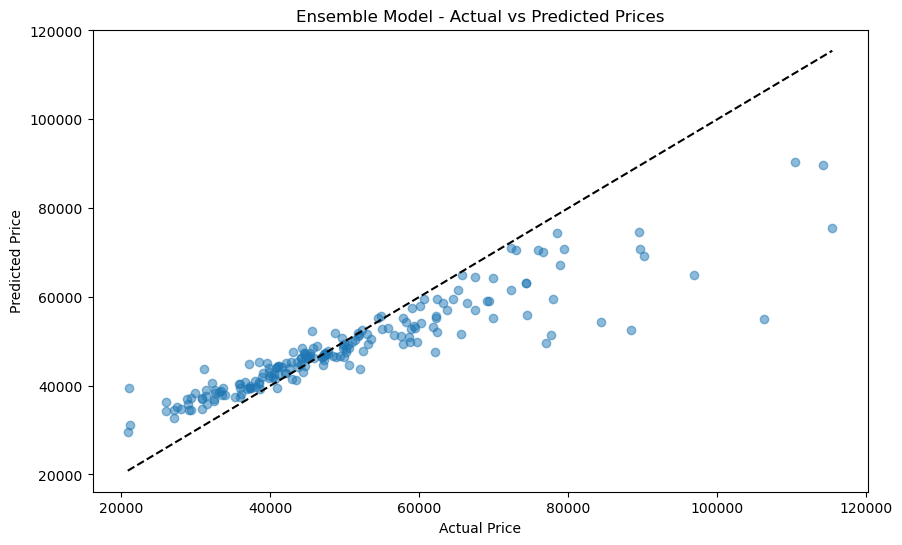

In [43]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

data['age'] = 2024 - data['year']
data['brand'] = data['name'].apply(lambda x: x.split()[0])


data = data.dropna(subset=['price'])

# Define target and features
X = data.drop('price', axis=1)
y = data['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
num_features = ['age', 'mileage', 'cylinders', 'doors']
cat_features = ['make', 'model', 'fuel', 'transmission', 'trim', 'body', 'exterior_color', 'interior_color', 'drivetrain', 'brand']

# Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

# Define the individual models
lr = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
rf = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])
svr = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SVR())])

# Ensemble Model using Voting Regressor
ensemble = VotingRegressor(estimators=[
    ('lr', lr),
    ('rf', rf),
    ('svr', svr)
])

# Train the ensemble model
ensemble.fit(x_train, y_train)

# Evaluate the ensemble model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = ensemble.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Visualize Predictions vs Actual Prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ensemble Model - Actual vs Predicted Prices')
plt.show()


Cross-Validation R^2 Scores:  [0.72601696 0.78664637 0.55854859 0.67660766 0.76107594]
Mean R^2 Score:  0.7017791036401004
Standard Deviation of R^2 Scores:  0.08056627393180041
Mean Absolute Error (MAE): 5835.30915858259
Mean Squared Error (MSE): 86391439.67582029
R^2 Score: 0.7171114535160452


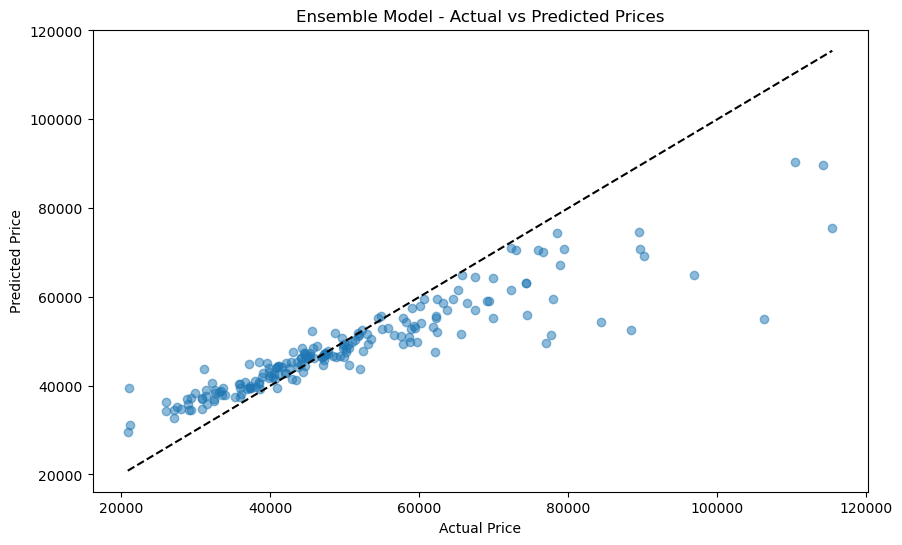

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the ensemble model using cross-validation
cv_results = cross_val_score(ensemble, x_train, y_train, cv=kf, scoring='r2')

# Print cross-validation results
print("Cross-Validation R^2 Scores: ", cv_results)
print("Mean R^2 Score: ", cv_results.mean())
print("Standard Deviation of R^2 Scores: ", cv_results.std())

# Train the ensemble model on the full training data
ensemble.fit(x_train, y_train)

# Evaluate the ensemble model on the test data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = ensemble.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Visualize Predictions vs Actual Prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ensemble Model - Actual vs Predicted Prices')
plt.show()
